# <a name="0">Dogs vs. Cats</a>
## A Computer Vision Problem.
### The competition page from [this](https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/code) link.

### Table of Contents of the notebook:

1. <a href="#1">**Libraries**</a>
2. <a href="#2">**Unzipping Data**</a>
3. <a href="#3">**put cats and dogs into two folders**</a>
4. <a href="#4">**Display some Imgs**</a>
5. <a href="#5">**BaseLine Model**</a>
6. <a href="#6">**Data Augmentation Model**</a>
7. <a href='#7'>**Frozen Model**</a>
8. <a href='#8'>**Fine Tuning Model**</a>
9. <a href="#9">**Evalution**</a>
10. <a href="#10">**Prediction**</a>


# 1. <a name="1">**Libraries**</a>

In [1]:
!pip install --upgrade  tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: tensorboard
    Found exi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from getpass import getpass
import os, shutil

import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from tensorflow.keras.models import load_model

In [3]:
keras.__version__

'2.8.0'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2. <a name="2">**Unzipping Data**</a>

In [5]:
user = 'andrewabdelmessih'
key = 'f51c61c5e50f7c6e92c07b1d228b7d3f'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 811M/814M [00:06<00:00, 142MB/s]
100% 814M/814M [00:06<00:00, 130MB/s]


In [7]:
!unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [8]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [9]:
!unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

# 3. <a name="3">**put cats and dogs into two folders**</a>

In [10]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train'

# The directory where we will
# store our smaller dataset
base_dir = '/content/cats_and_dogs'
try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train/')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation/')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test/')
try:
  os.mkdir(test_dir)
except:
  pass   

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats/')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs/')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats/')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs/')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats/')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs/')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 3250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 3250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 4. <a name="4">**Display some Imgs**</a>

(374, 500, 3)


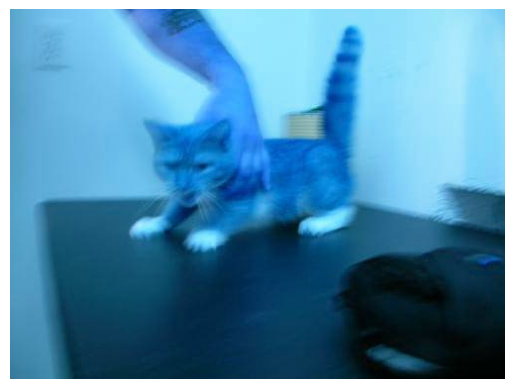

(375, 499, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

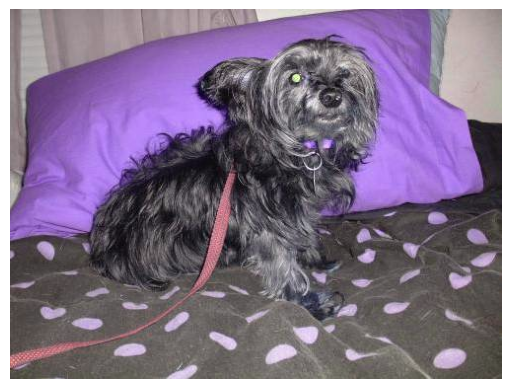

In [ ]:
import cv2

cat_img = cv2.imread("/content/cats_and_dogs/train/cats/cat.0.jpg")
print(cat_img.shape)
plt.imshow(cat_img)
plt.axis("off")
plt.show()

dog_img = cv2.imread("/content/cats_and_dogs/train/dogs/dog.0.jpg")
print(dog_img.shape)
plt.imshow(dog_img)
plt.axis("off")
plt.show

# 5. <a name="5">**BaseLine Model**</a>

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/content/cats_and_dogs/test',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), name='Input', activation= 'relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), name='Layer_1', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), name='Layer_2', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), name='Layer_3', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu', name='Layer_4'))
model.add(layers.Dense(1, activation='sigmoid', name='Output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv2D)              (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 Layer_1 (Conv2D)            (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 Layer_2 (Conv2D)            (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_generator)

Epoch 1/30
100/100 [==============================] - 32s 219ms/step - loss: 0.6770 - accuracy: 0.5611 - val_loss: 0.6448 - val_accuracy: 0.6270
Epoch 2/30
100/100 [==============================] - 26s 255ms/step - loss: 0.6022 - accuracy: 0.6782 - val_loss: 0.6177 - val_accuracy: 0.6740
Epoch 3/30
100/100 [==============================] - 23s 229ms/step - loss: 0.5482 - accuracy: 0.7173 - val_loss: 0.5744 - val_accuracy: 0.6960
Epoch 4/30
100/100 [==============================] - 21s 212ms/step - loss: 0.5123 - accuracy: 0.7466 - val_loss: 0.5713 - val_accuracy: 0.7120
Epoch 5/30
100/100 [==============================] - 21s 207ms/step - loss: 0.4686 - accuracy: 0.7790 - val_loss: 0.6117 - val_accuracy: 0.6820
Epoch 6/30
100/100 [==============================] - 21s 213ms/step - loss: 0.4622 - accuracy: 0.7787 - val_loss: 0.5488 - val_accuracy: 0.7250
Epoch 7/30
100/100 [==============================] - 23s 228ms/step - loss: 0.4271 - accuracy: 0.8007 - val_loss: 0.5514 - val_ac

In [ ]:
train_acc, train_loss = model.evaluate(train_generator)

157/157 [==============================] - 23s 147ms/step - loss: 0.0044 - accuracy: 1.0000


In [ ]:
val_acc, val_loss = model.evaluate(val_generator)

32/32 [==============================] - 4s 119ms/step - loss: 1.2069 - accuracy: 0.7760


In [ ]:
test_acc, test_loss = model.evaluate(test_generator)

16/16 [==============================] - 3s 153ms/step - loss: 1.2579 - accuracy: 0.7520


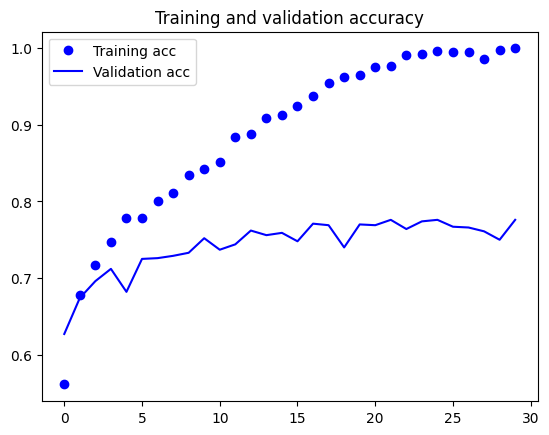

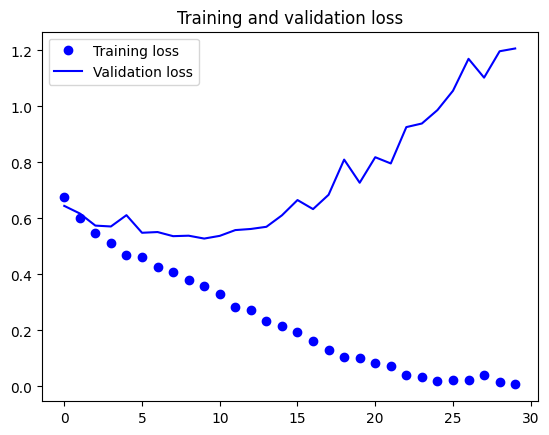

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('drive/My Drive/Deep Learning/cats-vs-dogs/CNN-Model.h5')
print("Saved model to Drive")

Saved model to Drive


# 6. <a name="6">**Data Augmentation Model**</a>

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = val_datagen.flow_from_directory('/content/cats_and_dogs/test',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_aug = models.Sequential()

model_aug.add(layers.Conv2D(64, (3, 3), name='Input', activation= 'relu', input_shape=(256,256,3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), name='Layer_1', activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), name='Layer_2', activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), name='Layer_3', activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Flatten())

model_aug.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(512, activation='relu', name='Layer_4'))
model_aug.add(layers.Dense(1, activation='sigmoid', name='Output'))

In [ ]:
model_aug.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv2D)              (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 Layer_1 (Conv2D)            (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 Layer_2 (Conv2D)            (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model_aug.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_aug = model_aug.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=val_generator)

Epoch 1/30
100/100 [==============================] - 67s 660ms/step - loss: 0.6935 - accuracy: 0.5094 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 67s 668ms/step - loss: 0.6780 - accuracy: 0.5690 - val_loss: 0.6658 - val_accuracy: 0.5860
Epoch 3/30
100/100 [==============================] - 63s 631ms/step - loss: 0.6497 - accuracy: 0.6086 - val_loss: 0.6275 - val_accuracy: 0.6400
Epoch 4/30
100/100 [==============================] - 66s 659ms/step - loss: 0.6388 - accuracy: 0.6360 - val_loss: 0.6219 - val_accuracy: 0.6590
Epoch 5/30
100/100 [==============================] - 66s 660ms/step - loss: 0.6121 - accuracy: 0.6584 - val_loss: 0.5891 - val_accuracy: 0.6840
Epoch 6/30
100/100 [==============================] - 65s 647ms/step - loss: 0.5890 - accuracy: 0.6842 - val_loss: 0.5715 - val_accuracy: 0.6900
Epoch 7/30
100/100 [==============================] - 64s 640ms/step - loss: 0.5880 - accuracy: 0.6866 - val_loss: 0.5697 - val_ac

In [ ]:
train_acc, train_loss = model_aug.evaluate(train_generator)

157/157 [==============================] - 103s 655ms/step - loss: 0.4634 - accuracy: 0.7814


In [ ]:
val_acc, val_loss = model_aug.evaluate(val_generator)

32/32 [==============================] - 4s 135ms/step - loss: 0.4243 - accuracy: 0.8040


In [ ]:
test_acc, test_loss = model_aug.evaluate(test_generator)

16/16 [==============================] - 3s 196ms/step - loss: 0.4316 - accuracy: 0.7840


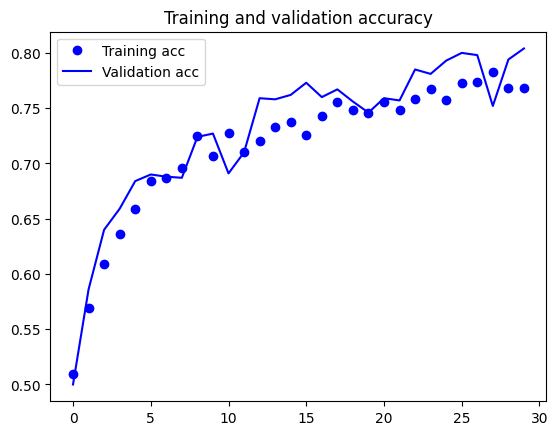

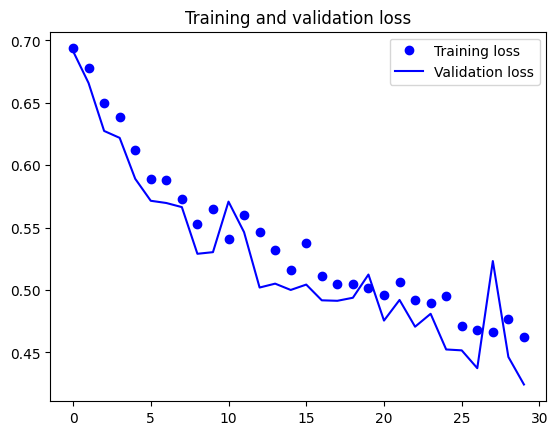

In [ ]:
import matplotlib.pyplot as plt

acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_aug.save('drive/My Drive/Deep Learning/cats-vs-dogs/Data-Aug-Model.h5')
print("Saved model to Drive")

Saved model to Drive


# 7. <a name="7">**Frozen Model**</a>



In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = val_datagen.flow_from_directory('/content/cats_and_dogs/test',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (256, 256, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model_DL = models.Sequential()
model_DL.add(conv_base)
model_DL.add(layers.Flatten())
model_DL.add(layers.Dense(512, activation='relu'))
# model_DL.add(layers.Dropout(0.35))
# model_DL.add(layers.Dense(128, activation='relu'))
# model_DL.add(layers.Dropout(0.35))
# model_DL.add(layers.Dense(32, activation='relu'))
model_DL.add(layers.Dense(1, activation='sigmoid'))

model_DL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 31,492,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [ ]:
model_DL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 16,778,241
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_DL.compile(optimizer = optimizers.Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
              metrics=['accuracy'])

history_DL = model_DL.fit(train_generator,
                    epochs=20,
                    steps_per_epoch = 100,
                    validation_data=val_generator,
                    verbose=1)

Epoch 1/20
100/100 [==============================] - 74s 729ms/step - loss: 1.2058 - accuracy: 0.9134 - val_loss: 0.4687 - val_accuracy: 0.9530
Epoch 2/20
100/100 [==============================] - 72s 714ms/step - loss: 0.3508 - accuracy: 0.9537 - val_loss: 0.1771 - val_accuracy: 0.9770
Epoch 3/20
100/100 [==============================] - 70s 701ms/step - loss: 0.1883 - accuracy: 0.9672 - val_loss: 0.1623 - val_accuracy: 0.9720
Epoch 4/20
100/100 [==============================] - 72s 724ms/step - loss: 0.1179 - accuracy: 0.9713 - val_loss: 0.1372 - val_accuracy: 0.9710
Epoch 5/20
100/100 [==============================] - 71s 707ms/step - loss: 0.1485 - accuracy: 0.9632 - val_loss: 0.1357 - val_accuracy: 0.9730
Epoch 6/20
100/100 [==============================] - 70s 698ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.1549 - val_accuracy: 0.9700
Epoch 7/20
100/100 [==============================] - 72s 717ms/step - loss: 0.0828 - accuracy: 0.9780 - val_loss: 0.1207 - val_ac

In [ ]:
train_acc, train_loss = model_DL.evaluate(train_generator)

157/157 [==============================] - 97s 615ms/step - loss: 0.0427 - accuracy: 0.9842


In [ ]:
val_acc, val_loss = model_DL.evaluate(val_generator)

32/32 [==============================] - 7s 202ms/step - loss: 0.0558 - accuracy: 0.9870


In [ ]:
test_acc, test_loss = model_DL.evaluate(test_generator)

16/16 [==============================] - 6s 365ms/step - loss: 0.0455 - accuracy: 0.9860


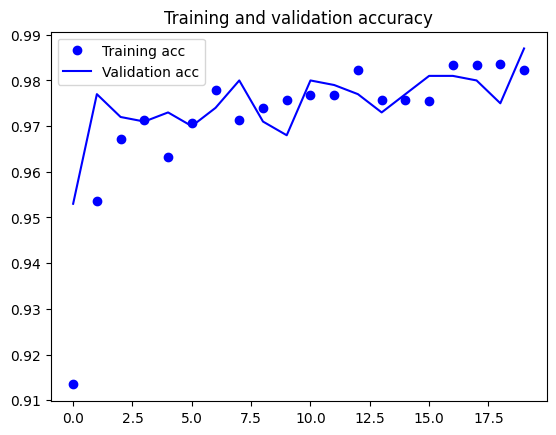

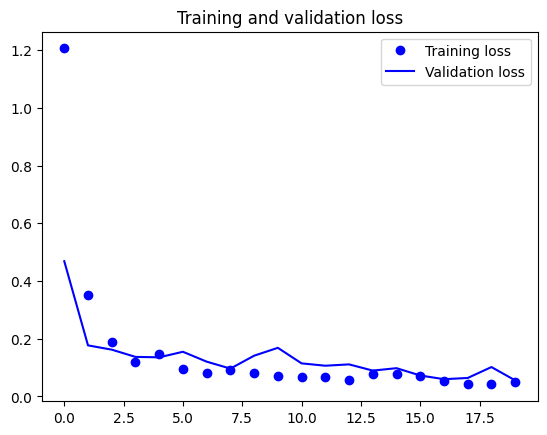

In [ ]:
import matplotlib.pyplot as plt

acc = history_DL.history['accuracy']
val_acc = history_DL.history['val_accuracy']
loss = history_DL.history['loss']
val_loss = history_DL.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_DL.save('drive/My Drive/Deep Learning/cats-vs-dogs/Frozen-Model-Model.h5')
print("Saved model to Drive")

Saved model to Drive


# 8. <a name="8">**Fine Tuning Model**</a>



In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model_copy= keras.models.clone_model(model_DL)
model_copy.build((None, 150, 150, 3))                                
model_copy.compile(optimizer = optimizers.Adam(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
model_copy.set_weights(model_DL.get_weights())

model_copy.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 23,857,665
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model_copy.compile(optimizer = optimizers.Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_FT = model_copy.fit(
      train_generator,
      steps_per_epoch=100,                 #train.n//train.batch_size,
      epochs=20,
      validation_data=val_generator,                 #val.n//val.batch_size)
      verbose=1)

Epoch 1/20
100/100 [==============================] - 75s 734ms/step - loss: 0.2373 - accuracy: 0.9323 - val_loss: 0.1344 - val_accuracy: 0.9710
Epoch 2/20
100/100 [==============================] - 69s 692ms/step - loss: 0.1340 - accuracy: 0.9528 - val_loss: 0.1329 - val_accuracy: 0.9590
Epoch 3/20
100/100 [==============================] - 70s 695ms/step - loss: 0.1159 - accuracy: 0.9625 - val_loss: 0.0478 - val_accuracy: 0.9800
Epoch 4/20
100/100 [==============================] - 73s 726ms/step - loss: 0.0944 - accuracy: 0.9638 - val_loss: 0.0519 - val_accuracy: 0.9780
Epoch 5/20
100/100 [==============================] - 69s 690ms/step - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.0936 - val_accuracy: 0.9800
Epoch 6/20
100/100 [==============================] - 72s 713ms/step - loss: 0.0808 - accuracy: 0.9723 - val_loss: 0.0681 - val_accuracy: 0.9710
Epoch 7/20
100/100 [==============================] - 70s 698ms/step - loss: 0.0877 - accuracy: 0.9679 - val_loss: 0.0693 - val_ac

In [ ]:
train_acc_FT, train_loss_FT = model_copy.evaluate(train_generator)

157/157 [==============================] - 100s 637ms/step - loss: 0.0277 - accuracy: 0.9908


In [ ]:
val_acc_FT, val_loss_FT = model_copy.evaluate(val_generator)

32/32 [==============================] - 7s 214ms/step - loss: 0.0594 - accuracy: 0.9880


In [ ]:
test_acc, test_loss = model_copy.evaluate(test_generator)

16/16 [==============================] - 4s 211ms/step - loss: 0.0472 - accuracy: 0.9920


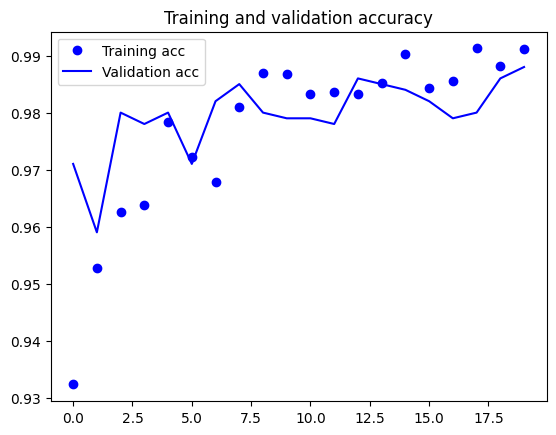

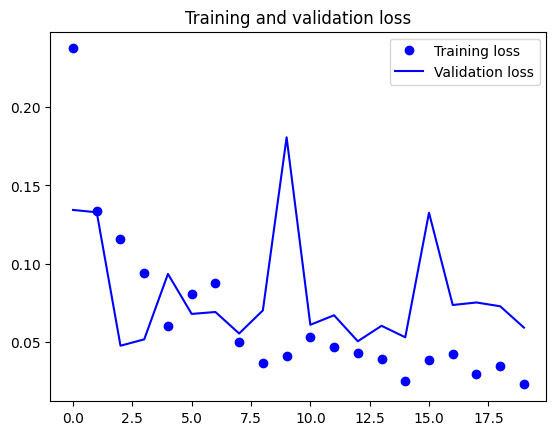

In [ ]:
import matplotlib.pyplot as plt

acc = history_FT.history['accuracy']
val_acc = history_FT.history['val_accuracy']
loss = history_FT.history['loss']
val_loss = history_FT.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

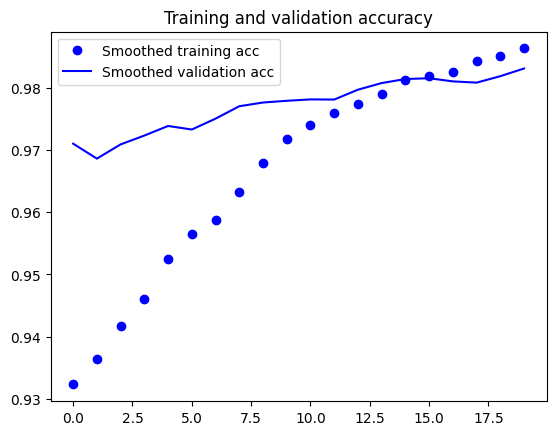

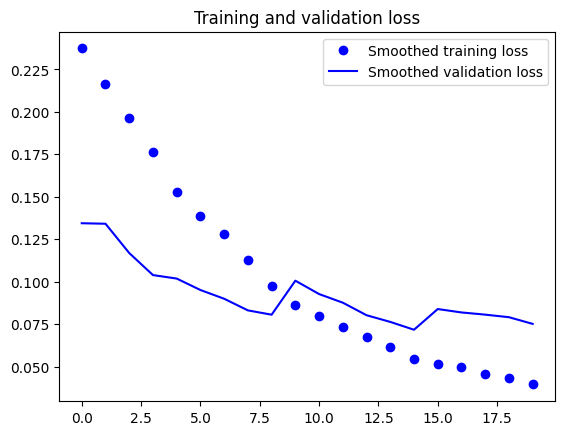

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_copy.save('drive/My Drive/Deep Learning/cats-vs-dogs/Fine-Tuning-Model-Model.h5')
print("Saved model to Drive")

Saved model to Drive


# 9. <a name="9">**Evaluation**</a>



In [ ]:
# CNN
acc1=history.history['accuracy'][-1]
vacc1=history.history['val_accuracy'][-1]
loss1=history.history['loss'][-2]
vloss1=history.history['val_loss'][-2]

# # Data Augmentation
acc2=history_aug.history['accuracy'][-1]
vacc2=history_aug.history['val_accuracy'][-1]
loss2=history_aug.history['loss'][-2]
vloss2=history_aug.history['val_loss'][-2]

# VGG16
acc3=history_DL.history['accuracy'][-1]
vacc3=history_DL.history['val_accuracy'][-1]
loss3=history_DL.history['loss'][-2]
vloss3=history_DL.history['val_loss'][-2]

# VGG16 Fine Tune
acc4=history_FT.history['accuracy'][-1]
vacc4=history_FT.history['val_accuracy'][-1]
loss4=history_FT.history['loss'][-2]
vloss4=history_FT.history['val_loss'][-2]

In [ ]:
results = pd.DataFrame([#["Dense model",acc1*100,vacc1*100,loss1,vloss1],
                       ["CNN",acc1*100,vacc1*100,loss1,vloss1],
                       ["CNN_data_augmentation",acc2*100,vacc2*100,loss2,vloss2],
                       ["Transfer Learning model",acc3*100,vacc3*100,loss3,vloss3],
                       ["Transfer Learning model_FT",acc4*100,vacc4*100,loss4,vloss4]],
                       columns = ["Model","Training Accuracy %","Validation Accuracy %", 'Loss', 'Validation Loss'])
results

,Model,Training Accuracy %,Validation Accuracy %,Loss,Validation Loss
0,CNN,99.968517,77.600002,0.014251,1.196982
1,CNN_data_augmentation,76.826197,80.400002,0.477084,0.446351
2,Transfer Learning model,98.236775,98.699999,0.042949,0.101940
3,Transfer Learning model_FT,99.118388,98.799998,0.035010,0.072986


# 10. <a name="10">**Prediction**</a>

In [11]:
model = load_model("/content/gdrive/My Drive/Deep Learning/Projects/Cats Vs. Dogs/Fine-Tuning-Model-Model.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 23,857,665
Non-trainable params: 7,635,264
_________________________________________________________________


In [19]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test = test_datagen.flow_from_directory('/content/.',
                                                  classes=['test'],
                                                  target_size=(256, 256),
                                                  batch_size = 20,
                                                  class_mode = None,
                                                  shuffle = False)

Found 12500 images belonging to 1 classes.


In [42]:
Predict = model.predict(test)

In [43]:
import os

img_names = []
for img_name in os.listdir('/content/test'):
    img_names.append(img_name)

img_names = np.sort(img_names)

In [44]:
img_names

array(['1.jpg', '10.jpg', '100.jpg', ..., '9997.jpg', '9998.jpg',
       '9999.jpg'], dtype='<U9')

In [45]:
from PIL import Image
import cv2

cates = {0: 'cat', 1: 'dog'}

def load_images_and_labels(data_path):
    x = []
    i = 0
    for img_name in img_names:

        img = cv2.imread(data_path + '/' + img_name)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            img_rs = img_array.resize((150, 150))
            img_rs = np.array(img_rs)
            x.append(img_rs)
            i+=1
        if i ==100:
            break
    return x

In [46]:
x = load_images_and_labels('/content/test')

In [51]:
Predict

array([[1.0000000e+00],
       [1.0073092e-22],
       [1.3577704e-03],
       ...,
       [1.0000000e+00],
       [0.0000000e+00],
       [4.6540553e-11]], dtype=float32)

In [57]:
asign = lambda x:1 if x>=0.5 else 0
Predict = list(map(asign, Predict))
Predict

# asign = lambda x:float(x) if True else 0
# Predict = list(map(asign, Predict))
# Predict

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,


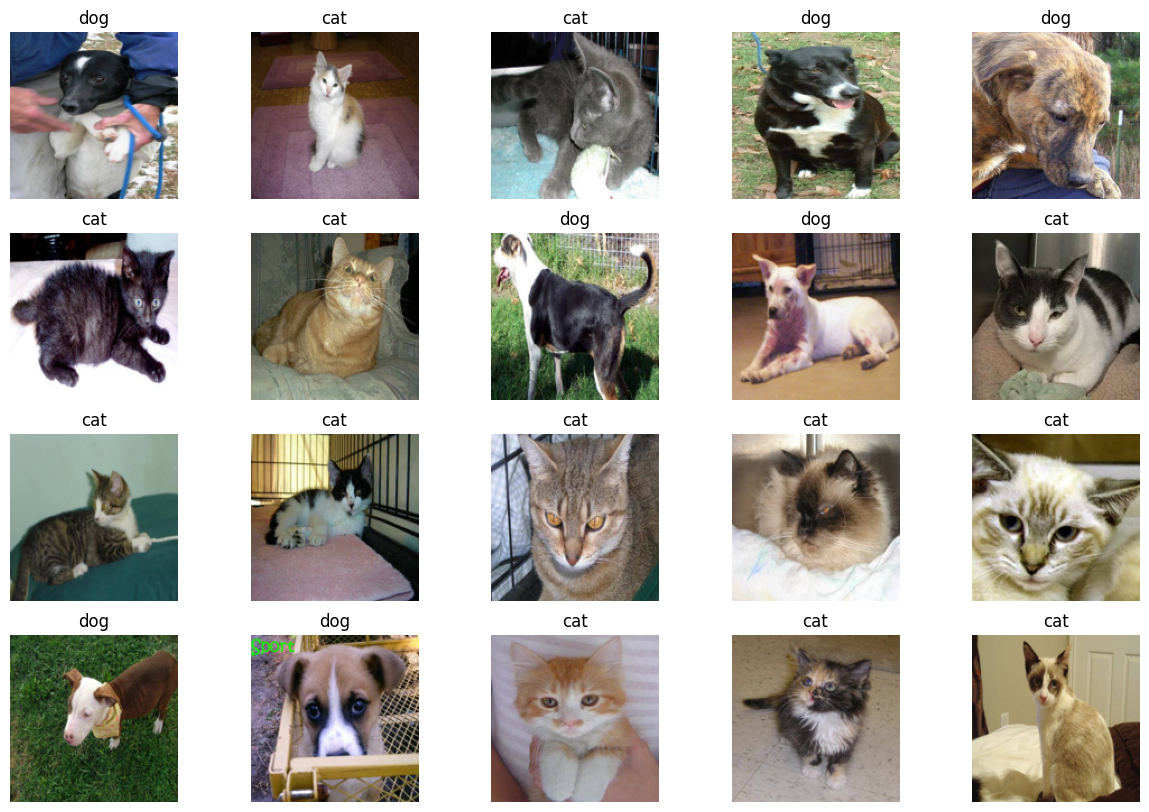

In [65]:
plt.figure(figsize=(15, 10))

for i in range(0, 20, 1):
    plt.subplot(4, 5, i+1)
    plt.imshow(x[i])
    plt.axis("off")
    plt.title(cates[Predict[i]])

In [66]:
import pandas as pd
df = pd.read_csv("/content/sample_submission.csv")
df.head(10)

,id,label
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5
5,6,0.5
6,7,0.5
7,8,0.5
8,9,0.5
9,10,0.5


In [ ]:
id = [i+1 for i in range(len(Predict))]
id

In [69]:
sub = pd.DataFrame({'id': id, 'label': Predict})
sub.head(10)

,id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1
5,6,0
6,7,0
7,8,1
8,9,1
9,10,0


In [56]:
sub[['id', 'label']].to_csv(r'/content/sub.csv', index=False)